In [ ]:
# Necessary packages
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data
note_types = pd.read_csv("data/note_type.csv")
note_embeddings = pd.read_csv("data/note_embedding.csv")
data = pd.merge(note_types, note_embeddings, on="note")

In [ ]:
# Split information
notes = data["note"].values
types = data["class"].values
embeddings = data.drop(columns=["note", "class"]).values

In [ ]:
# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(embeddings)

In [ ]:
# Separate similarities into same-class and different-class
same_class_sims = []
diff_class_sims = []

n = len(notes)
for i in range(n):
    for j in range(i+1, n):
        sim = similarity_matrix[i, j]
        if types[i] == types[j]:
            same_class_sims.append(sim)
        else:
            diff_class_sims.append(sim)
            
print("Mean cosine similarity (same class):", np.mean(same_class_sims))
print("Mean cosine similarity (different class):", np.mean(diff_class_sims))

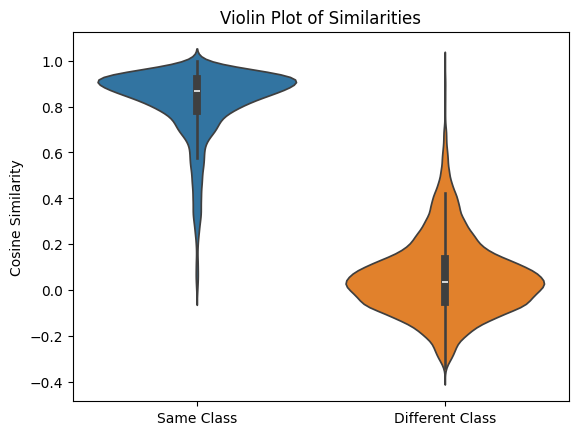

In [ ]:
# Violin
sns.violinplot(data=[same_class_sims, diff_class_sims])
plt.xticks([0,1], ["Same Class", "Different Class"])
plt.ylabel("Cosine Similarity")
plt.title("Violin Plot of Similarities")
plt.savefig("img/note_embedding_evaluation_violin.png", dpi=300)
plt.show()

C:\Users\wilson\AppData\Local\Temp\ipykernel_27168\4039201461.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(same_class_sims, label="Same Class", shade=True)
C:\Users\wilson\AppData\Local\Temp\ipykernel_27168\4039201461.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diff_class_sims, label="Different Class", shade=True)


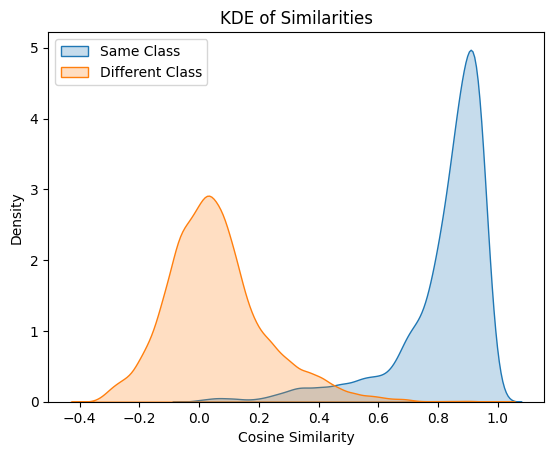

In [ ]:
sns.kdeplot(same_class_sims, label="Same Class", shade=True)
sns.kdeplot(diff_class_sims, label="Different Class", shade=True)
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
plt.title("KDE of Similarities")
plt.legend()
plt.savefig("img/note_embedding_evaluation_KDE.png",dpi=300)
plt.show()